In [329]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [330]:
#!pip install sklearn

In [331]:
#!pip install openpyxl

In [332]:
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (16)')

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Успех                        69 non-null     object 
 1   Площадь загальна кв.м        69 non-null     float64
 2   Этаж                         69 non-null     int64  
 3   Количество касс              69 non-null     int64  
 4   Тип                          69 non-null     object 
 5   Рейтинг в гуглі              69 non-null     float64
 6   Количество чеков             62 non-null     float64
 7   Средний чек                  62 non-null     float64
 8   Населення                    64 non-null     float64
 9   Середній дохід наелення,грн  64 non-null     float64
 10  Аптека                       69 non-null     int64  
 11  Секон хенд                   69 non-null     int64  
 12  Магазин мобільного звязку    69 non-null     int64  
 13  Продуктовий ринок     

В переменных Количество чеков, Средний чек, Населення и Середній дохід населення,грн есть пропущенные значения.

In [334]:
dfm = df

from sklearn.impute import SimpleImputer

kol_ch_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Количество чеков']] = kol_ch_mean.fit_transform(dfm[['Количество чеков']]).round()

sr_ch_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Средний чек']] = sr_ch_mean.fit_transform(dfm[['Средний чек']]).round()


nas_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Населення']] = nas_mean.fit_transform(dfm[['Населення']]).round()

cr_d_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Середній дохід наелення,грн']] = cr_d_mean.fit_transform(dfm[['Середній дохід наелення,грн']]).round()

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Успех                        69 non-null     object 
 1   Площадь загальна кв.м        69 non-null     float64
 2   Этаж                         69 non-null     int64  
 3   Количество касс              69 non-null     int64  
 4   Тип                          69 non-null     object 
 5   Рейтинг в гуглі              69 non-null     float64
 6   Количество чеков             69 non-null     float64
 7   Средний чек                  69 non-null     float64
 8   Населення                    69 non-null     float64
 9   Середній дохід наелення,грн  69 non-null     float64
 10  Аптека                       69 non-null     int64  
 11  Секон хенд                   69 non-null     int64  
 12  Магазин мобільного звязку    69 non-null     int64  
 13  Продуктовий ринок     

<AxesSubplot:ylabel='Frequency'>

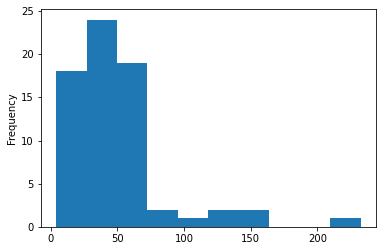

In [336]:
df['Площадь загальна кв.м'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

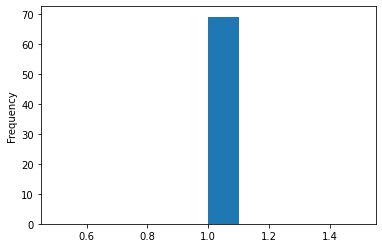

In [337]:
df['Этаж'].plot(kind = 'hist')

Т.к.данный показатель не вариантивный, мы можем его удалить.

In [338]:
df = df.drop(['Этаж'], axis='columns', inplace=False)
dfr.shape

(69, 14)

<AxesSubplot:ylabel='Frequency'>

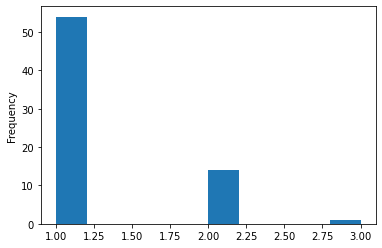

In [339]:
df['Количество касс'].plot(kind = 'hist')

Мы видим, что кол-во касс больше 2 для нашей выборки нетипично.

In [340]:
df = df.drop(df[df['Количество касс'] > 2].index)

<AxesSubplot:ylabel='Frequency'>

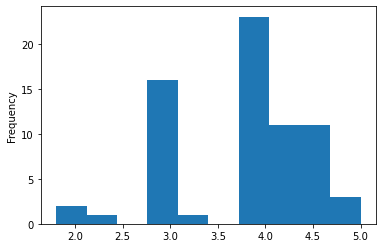

In [341]:
df['Рейтинг в гуглі'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

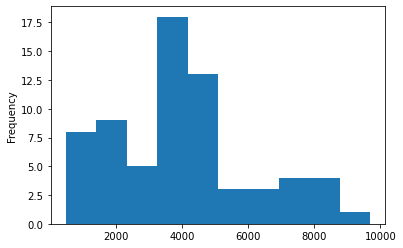

In [342]:
df['Количество чеков'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

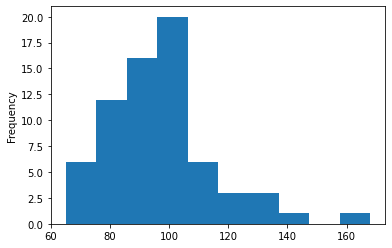

In [343]:
df['Средний чек'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

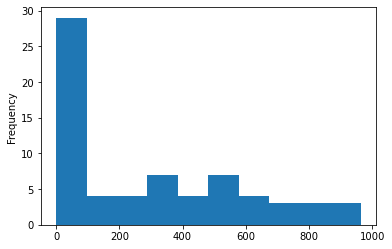

In [344]:
df['Населення'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

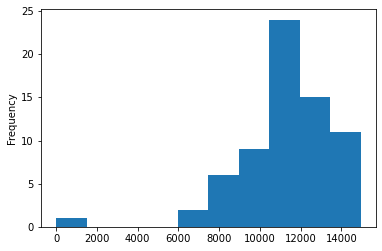

In [345]:
df['Середній дохід наелення,грн'].plot(kind = 'hist')

In [346]:
df.describe()

,Площадь загальна кв.м,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,47.573353,1.205882,3.822059,4011.573529,96.014706,286.161765,11295.338235,0.426471,0.147059,0.044118,0.161765,0.117647
std,38.120810,0.407351,0.693648,2152.933710,18.310337,301.845103,2362.824086,0.498241,0.356798,0.206883,0.370973,0.324585
min,4.000000,1.000000,1.800000,476.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.402500,1.000000,3.000000,2274.750000,84.500000,0.000000,10255.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.150000,1.000000,4.000000,4080.000000,95.500000,249.500000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.342500,1.000000,4.300000,4788.500000,101.250000,540.500000,12977.250000,1.000000,0.000000,0.000000,0.000000,0.000000
max,232.300000,2.000000,5.000000,9687.000000,168.000000,963.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [347]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [348]:
df3 = df[['Тип', 'Успех']]
info = []
for column in df3.columns:
        vals = {"col": column,
                "nunique": df3[column].nunique(),
                "unique": df3[column].unique(),
                "type": df3[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
1,Успех,2,"[не успішний, успішний]",object
0,Тип,5,"[Light, light, Standart, Micro, Premium]",object


In [349]:
fn = {'не успішний':0, 'успішний':1}
df['Успех'] = df['Успех'].map(fn)

In [350]:
df

,Успех,Площадь загальна кв.м,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
0,0,9.00,1,Light,3.0,659.0,77.0,108.0,13884.0,1,0,0,0,0
1,0,30.00,1,Light,4.1,1518.0,85.0,750.0,11700.0,1,0,0,0,0
2,0,15.00,1,light,3.0,476.0,112.0,0.0,6786.0,0,0,0,0,0
3,0,20.00,1,light,3.0,1310.0,120.0,0.0,12948.0,0,0,0,0,0
4,0,30.00,1,light,4.0,2029.0,95.0,0.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,2,Standart,4.0,6884.0,107.0,963.0,9399.0,1,0,0,0,0
65,1,27.26,1,Light,2.3,4721.0,89.0,0.0,14079.0,1,0,0,1,1
66,0,148.91,1,Light,3.0,3286.0,106.0,315.0,11427.0,0,1,0,0,0
67,0,50.93,2,Standart,4.3,3963.0,168.0,0.0,13338.0,0,0,0,1,1


In [351]:
fm = {'Light':1, 'light':1, 'Standart':2, 'Micro':3, 'Premium':4}
df['Тип'] = df['Тип'].map(fm)


In [352]:
df

,Успех,Площадь загальна кв.м,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
0,0,9.00,1,1,3.0,659.0,77.0,108.0,13884.0,1,0,0,0,0
1,0,30.00,1,1,4.1,1518.0,85.0,750.0,11700.0,1,0,0,0,0
2,0,15.00,1,1,3.0,476.0,112.0,0.0,6786.0,0,0,0,0,0
3,0,20.00,1,1,3.0,1310.0,120.0,0.0,12948.0,0,0,0,0,0
4,0,30.00,1,1,4.0,2029.0,95.0,0.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,2,2,4.0,6884.0,107.0,963.0,9399.0,1,0,0,0,0
65,1,27.26,1,1,2.3,4721.0,89.0,0.0,14079.0,1,0,0,1,1
66,0,148.91,1,1,3.0,3286.0,106.0,315.0,11427.0,0,1,0,0,0
67,0,50.93,2,2,4.3,3963.0,168.0,0.0,13338.0,0,0,0,1,1


In [353]:
X = df.iloc[:, 1:]
y = df['Успех']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [354]:
X_train

,Площадь загальна кв.м,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
43,44.00,2,1,5.0,7120.0,103.0,246.0,9594.0,1,1,0,1,1
20,44.00,1,1,4.2,4529.0,67.0,266.0,9399.0,0,0,0,1,0
41,60.00,2,2,4.6,9687.0,117.0,427.0,8736.0,1,1,0,0,0
56,51.00,2,2,4.0,5317.0,90.0,0.0,13572.0,0,0,0,1,0
67,50.93,2,2,4.3,3963.0,168.0,0.0,13338.0,0,0,0,1,1
58,34.43,1,1,5.0,4080.0,96.0,296.0,11307.0,0,0,0,0,0
30,65.00,1,2,4.0,3531.0,77.0,296.0,11307.0,0,0,0,0,0
15,140.22,1,1,3.0,4624.0,75.0,0.0,11700.0,1,0,0,0,0
23,120.00,2,2,4.1,6550.0,95.0,0.0,13806.0,1,0,1,0,0
48,20.00,1,1,3.9,1033.0,89.0,0.0,11934.0,0,0,0,0,0


In [358]:
df.to_csv('16_prep.csv', sep=',', index=False)

In [359]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Feature Selection

In [360]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

6
[False False False False  True False  True  True  True False  True  True
 False]
[4 8 5 7 1 2 1 1 1 3 1 1 6]


Из множества переменных значимыми являются: Количество чеков, Населення, Середній дохід населення,грн, Аптека, Магазин мобільного звязку, Продуктовий ринок.
Для дальнейшего анализа выберем 2 переменные, влияние которых мы хотим проверить на упешность торговой точки: Населення и Середній дохід населення,грн.

In [361]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

         Current function value: inf
         Iterations: 35


C:\Users\Julia\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Julia\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [362]:
X_train=X_train[:,[False, False, False, False, False, False, True, True, False, False, False, False, False]]
X_test=X_test[:,[False, False, False, False, False, False, True, True, False, False, False, False, False]]

# Parameters (Classification Tree)

In [363]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

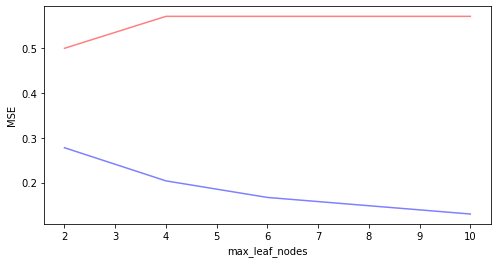

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

Видим, что дерево переобучено

# Model (Classification Tree)

In [365]:
ct = DecisionTreeClassifier(max_leaf_nodes = 2, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Results (Classification Tree)

In [366]:
y_pred = ct.predict(X_test)
y_pred = (y_pred > 0.5)
ct.score(X_test,y_test).round(3)

0.5

Точность модели 50%

In [367]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 4]
 [3 1]]


Видим, что 7 правильно распознанных объектов и 7 неправильно.

# Visualisation (Classification Tree)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


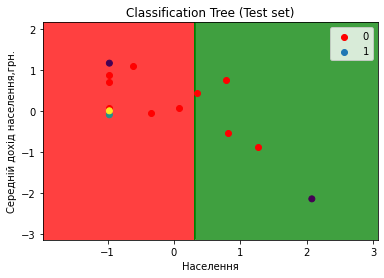

In [368]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Населення')
plt.ylabel('Середній дохід населення,грн.')
plt.legend()
plt.show()

# Paremeters (Forest)

In [369]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

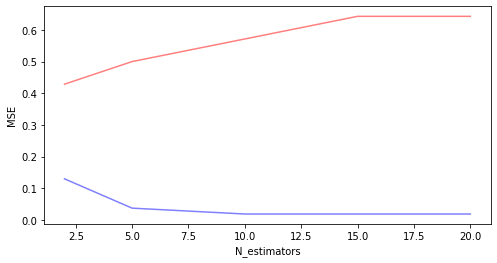

In [370]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

Можем сделать вывод, что лес переобучен.

In [371]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=2, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

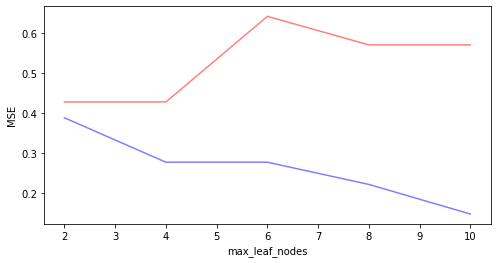

In [372]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# Model (Forest)

In [373]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

# Results

In [374]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.571

Видим, что данный результат лучше по сравнению с одним деревом. Точность модели 57%

In [375]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 2]
 [4 0]]


Видим, что  8 правильно распознанных объектов и 6 неправильно.

# Paremeters (CatBoost)

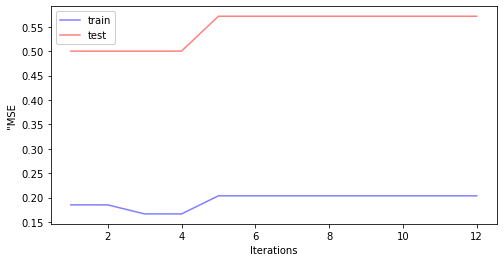

In [376]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

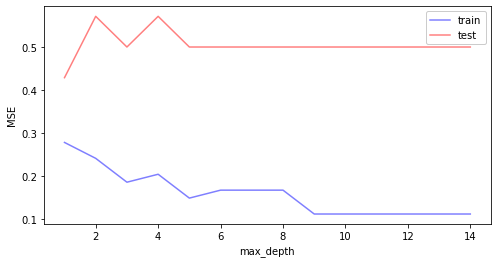

In [377]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=4,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

# Model (CatBoost)

In [378]:
cb = CatBoostClassifier(iterations=4,max_depth=3,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

# Results (CatBoost)

In [379]:
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

0.5

точность модели 50% как и у модели с одним деревом.

In [380]:
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[7 3]
 [4 0]]


Видим, что 7 правильно распознанных объектов и 7 неправильно.